In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import random

In [166]:
df = pd.read_csv(r'C:\Users\user\Downloads\Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [167]:
df.drop(['ID'],inplace=True,axis=1)

In [168]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

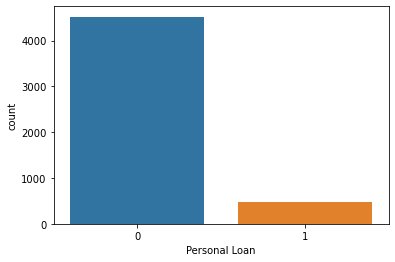

In [169]:
sns.countplot(x='Personal Loan',data=df)


In [170]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [171]:
col = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 
       'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard', 'Personal Loan']
df = df[col]

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [173]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [175]:
input_size = X_train.shape[1]
hidden_size = 100
output_size = len(np.unique(y_train))

In [176]:
population_size = 10

In [177]:
num_iterations = 100

In [178]:
mutation_rate = 0.1


In [179]:
population = []
for i in range(population_size):
    # Generate random weights for the neural network
    weights1 = np.random.randn(input_size, hidden_size)
    weights2 = np.random.randn(hidden_size, output_size)
    population.append((weights1, weights2))

In [180]:
def fitness_function(weights):
    # Calculate the output of the neural network
    hidden_layer = np.maximum(0, np.dot(X_train, weights[0]))
    output_layer = np.dot(hidden_layer, weights[1])
    
    # Calculate the accuracy of the neural network
    y_pred = np.argmax(output_layer, axis=1)
    accuracy = accuracy_score(y_train, y_pred)
    return accuracy

In [181]:
for iteration in range(num_iterations):
    # Evaluate the fitness of each individual in the population
    fitness_scores = [fitness_function(individual) for individual in population]
    
    # Sort the population by fitness score
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]
    
    # Define the knowledge source
    knowledge_source = sorted_population[0]
    
    # Update the population
    new_population = []
    for i in range(population_size):
        # Select an individual from the population
        individual = random.choice(sorted_population)
        
        # Mutate the individual
        weights1 = individual[0] + mutation_rate * np.random.randn(input_size, hidden_size)
        weights2 = individual[1] + mutation_rate * np.random.randn(hidden_size, output_size)
        new_individual = (weights1, weights2)
        
        # Combine the individual with the knowledge source
        combined_individual = (knowledge_source[0] + new_individual[0], knowledge_source[1] + new_individual[1])
        
        # Add the combined individual to the new population
        new_population.append(combined_individual)
        
    population = new_population
    
# Evaluate the fitness of the final population
fitness_scores = [fitness_function(individual) for individual in population]

# Sort the population by fitness score
sorted_population = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]

# Get the best individual from the population
best_individual = sorted_population[0]

# Calculate the output of the neural network on the testing set
hidden_layer = np.maximum(0, np.dot(X_test, best_individual[0]))
output_layer = np.dot(hidden_layer, best_individual[1])
y_pred = np.argmax(output_layer, axis=1)

In [182]:
 accuracy_score(y_test,y_pred)

0.912